# Turbine Library Interface

FLORIS allows users to select from a set of pre-defined turbines as well as load an external
library of turbines. This reference demonstrates how to load, compare, and interact with the
basic turbine properties prior to wake modeling.

## Setup

In [1]:
import numpy as np
from floris.turbine_library import TurbineInterface, TurbineLibrary

## Interacting With A Single Turbine

There are a few different ways that a ``TurbineInterface`` object can be created as demonstrated
below. For convenience, we'll only consider the object created from the internal library
(option 3).

- Option 1: Load from a `Turbine` object:
  `ti = TurbineInterface(turbine_obj)`
- Option 2: Load from a turbine configuration dictionary:
  `ti = TurbineInterface.from_turbine_dict(turbine_dict)`
- Option 3a: Load a file from the internal turbine library:
  `ti = TurbineInterface.from_library("internal", "iea_15MW.yaml")`
- Option 3b: Load a file from the internal turbine library:
  `ti = TurbineInterface.from_internal_library("iea_15MW.yaml")`
- Option 4: Load a file from an external turbine library:
  `ti = TurbineInterface.from_library("path/to/user/library", "iea_15MW.yaml")`
- Option 5: Load a file from anywhere:
  `ti = TurbineInterface.from_yaml("path/to/turbine.yaml")`

### Single Dimensional Turbine

In [2]:
ti = TurbineInterface.from_library("internal", "iea_15MW.yaml")

#### Plot the core attributes

For `TurbineInterface`, the core functionality is the power and thrust computation and plotting.

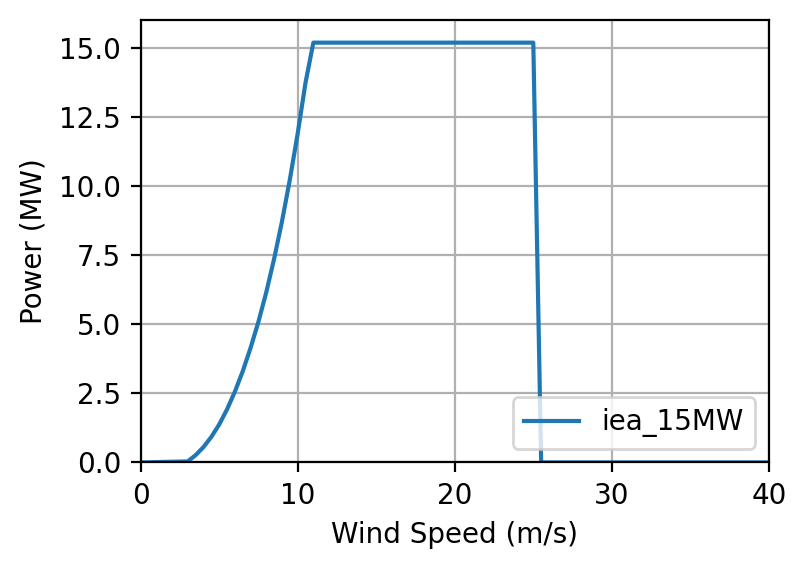

In [3]:
ti.plot_power_curve()

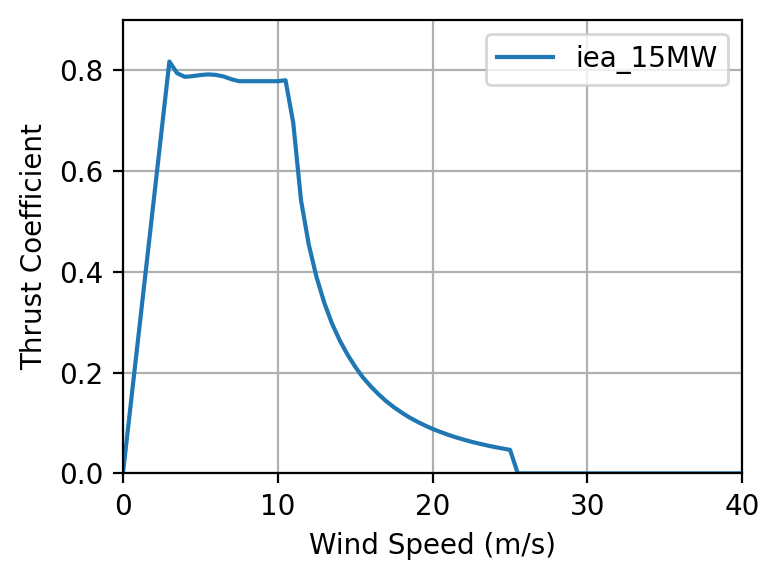

In [4]:
ti.plot_Ct_curve()

### Interacting With A Multi-Dimensional Turbine

In [5]:
ti_md = TurbineInterface.from_library("internal", "iea_15MW_multi_dim_cp_ct.yaml")

#### Plot the core attributes

In this example, we'll demonstrate how the usage for a multi-dimensional turbine is exactly the same, and how to produce cleaner figures.

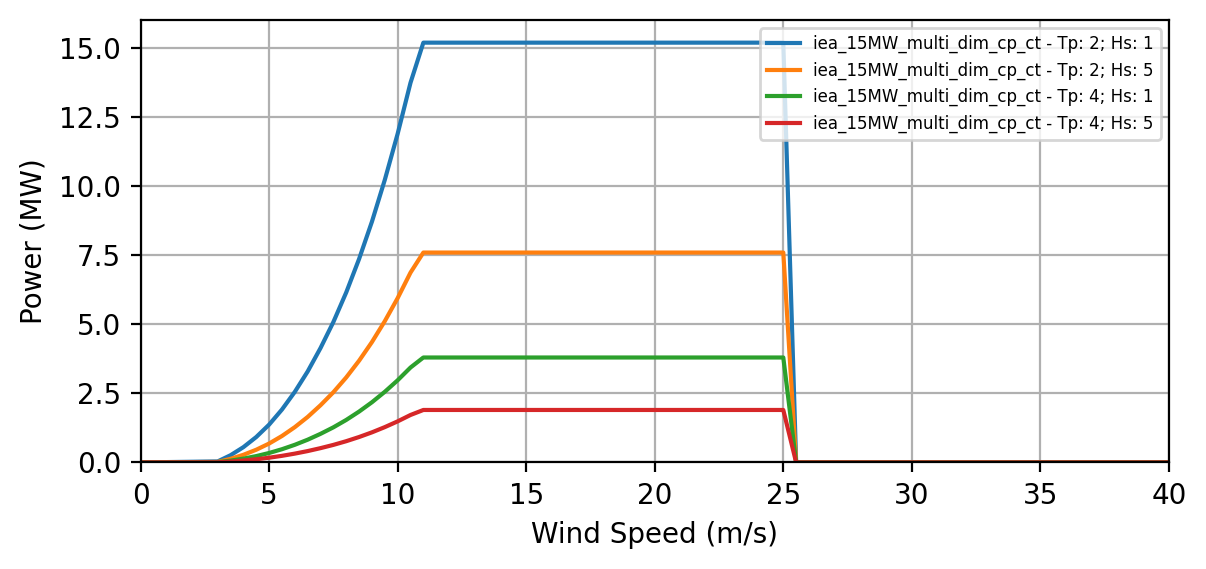

In [6]:
ti_md.plot_power_curve(
    fig_kwargs={"figsize": (6, 3)},  # The legend is a bit wider, so we'll need to change the dimensions
    legend_kwargs={"fontsize": 6},  # The labels are quite long, so let's shrink the font
)

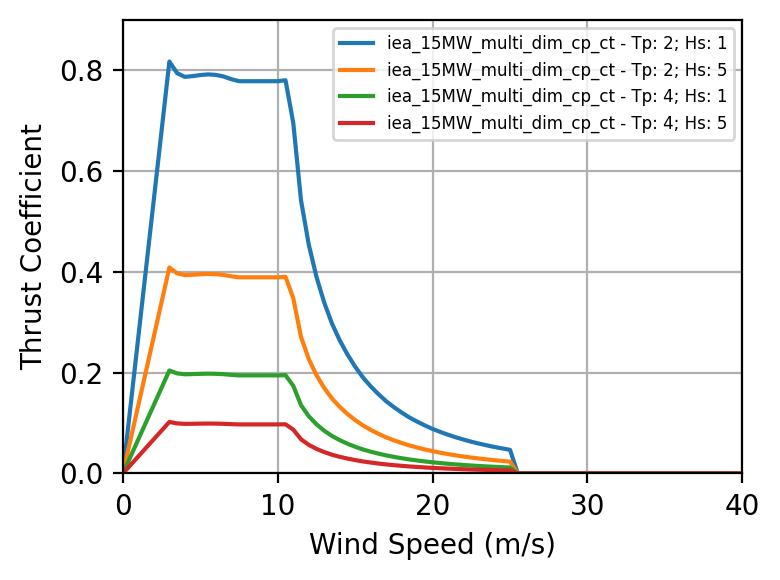

In [7]:
ti_md.plot_Ct_curve(
    legend_kwargs={"fontsize": 6},  # The labels are quite long, so let's shrink the font
)

## Compare multiple turbines

The other class provided by the turbine library is the `TurbineLibrary` object, which allows users
to simultaneously load internal and external turbine library configurations and compare them.

Note that turbine names can overlap between the internal and external turbine libraries in this
interface, so a little more care is required. This is distinct from how turbine inputs are
treated through `FlorisInterface` via `floris.simulation.farm` where duplicate turbine names
will raise an error.

### Loading the libraries

Loading a turbine library is either a 2 or more step process depending on how many turbine libraries
are going to be compared.

In [8]:
# Initialize the turbine library (no definitions required!)
tl = TurbineLibrary()

# Load the internal library, except the 20 MW turbine
tl.load_internal_library(exclude=["x_20MW.yaml"])
for turbine in tl.turbine_map:
    print(turbine)

iea_15MW
iea_15MW_multi_dim_cp_ct
nrel_5MW
iea_10MW
iea_15MW_floating


In addition to the `load_internal_library` method, there is a `load_external_library` method with
the same parameterizations, but with an argument for a new library file path.

We can also override previously ignored or loaded files by rerunning the load method again. Notice
how we use `which=["x_20MW.yaml"]` to now include the file. This makes it so we only load the one
turbine configuration, however, the same could be achieved by specifying none of the keyword
arguments.

In [9]:
tl.load_internal_library(which=["x_20MW.yaml"])
for turbine in tl.turbine_map:
    print(turbine)

iea_15MW
iea_15MW_multi_dim_cp_ct
nrel_5MW
iea_10MW
iea_15MW_floating
x_20MW


Notice that the "x_20MW" turbine is now loaded.

### Comparing turbines

There are a number of methods that will plot the varying properties for each turbine against each
other, but here the primary output will be displayed.

It should be noted that the 15MW turbines are all variations of each other, and so the
multi-dimensional example is removed in favor the of the floating 15MW turbine to highlight
a multi-dimensional turbine in relation to the standard 15 MW example.

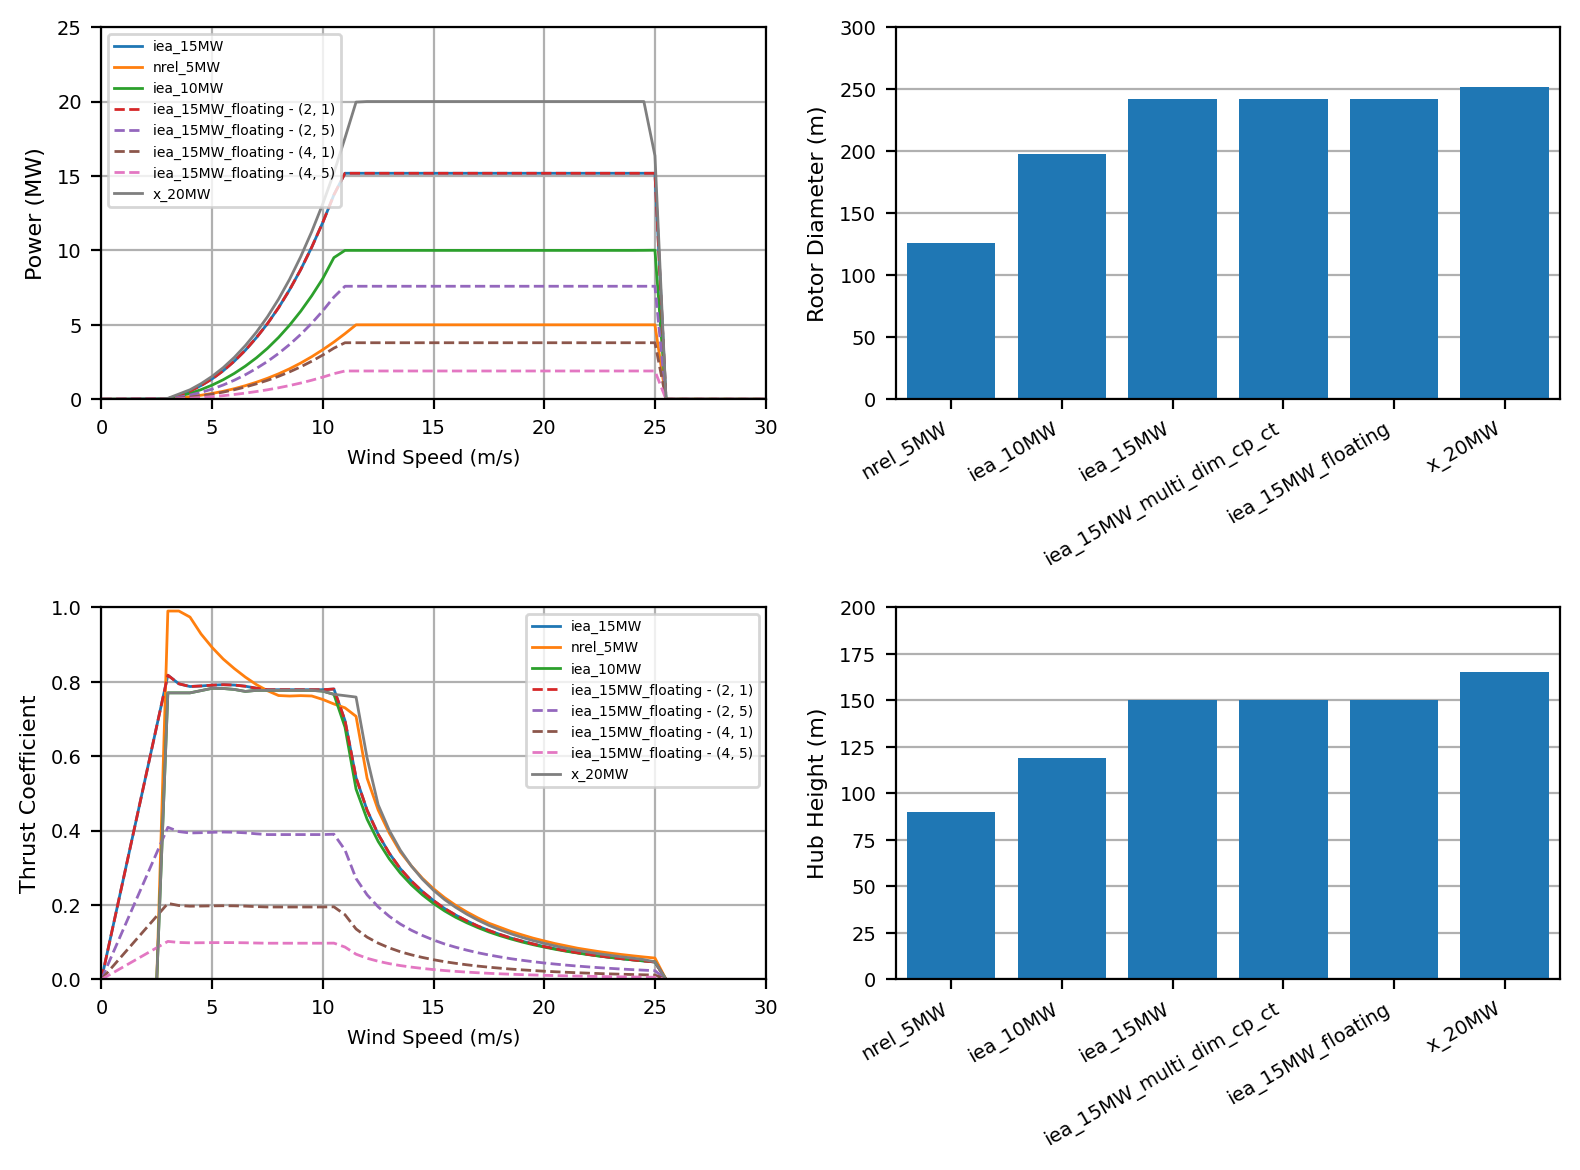

In [10]:
tl.plot_comparison(
    exclude=["iea_15MW_multi_dim_cp_ct"],  # Remove a turbine just for demonstration
    wind_speeds=np.linspace(0, 30, 61),  # 0 -> 30 m/s, every 0.5 m/s
    fig_kwargs={"figsize": (8, 8)},  # Size the figure appropriately for the docs page
    plot_kwargs={"linewidth": 1},  # Ensure the line plots look nice
    legend_kwargs={"fontsize": 5},  # Ensure all the legend items fit
)

Alternatively, these can all be ploted individually with:

- `plot_power_curves()`
- `plot_Ct_curves()`
- `plot_rotor_diameters()`
- `plot_hub_heights()`

For a text based approach, we can access the attributes like the following:

In [11]:
header = f"{'Turbine':>25} | Rotor Diameter (m) | Hub Height (m) | Air Density (ρ)"
print(header)
print("-" * len(header))
for name, t in tl.turbine_map.items():
    print(f"{name:>25}", end=" | ")
    print(f"{t.turbine.rotor_diameter:>18,.2f}", end=" | ")
    print(f"{t.turbine.hub_height:>14,.1f}", end=" | ")
    print(f"{t.turbine.ref_density_cp_ct:>15,.3f}")

                  Turbine | Rotor Diameter (m) | Hub Height (m) | Air Density (ρ)
---------------------------------------------------------------------------------
                 iea_15MW |             242.24 |          150.0 |           1.225
 iea_15MW_multi_dim_cp_ct |             242.24 |          150.0 |           1.225
                 nrel_5MW |             126.00 |           90.0 |           1.225
                 iea_10MW |             198.00 |          119.0 |           1.225
        iea_15MW_floating |             242.24 |          150.0 |           1.225
                   x_20MW |             252.00 |          165.0 |           1.225
